<a href="https://colab.research.google.com/github/TranThiDieuHien/pythonbasics/blob/master/BT_chi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats, interpolate
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [4]:
df = pd.read_csv('StudentsPerformance.csv')

In [5]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
583,female,group D,associate's degree,standard,completed,73,75,80
356,male,group A,associate's degree,standard,none,63,61,61
279,male,group B,bachelor's degree,free/reduced,none,73,56,57
968,female,group E,associate's degree,standard,none,68,76,67
21,female,group B,some college,free/reduced,completed,65,75,70
101,male,group D,bachelor's degree,standard,completed,68,74,74
271,male,group C,some college,standard,none,58,49,42
383,female,group E,some high school,free/reduced,none,38,49,45
632,female,group B,bachelor's degree,standard,completed,66,74,81
547,male,group C,high school,standard,completed,72,67,64


1. Nghiên cứu mối liên hệ về mặt thống kê của các biến gender với điểm reading và writing (chuyển điểm về A, B, C, D)

In [6]:
#Phan chia điểm theo thứ bậc: numerical -> categorical
#bins = pd.IntervalIndex.from.tuples([(0,60),(60, 75),(75,85),(85,100)])

In [7]:
#Với điểm Toán
bins = [0, 60, 75, 85, 100]
gen_math_df = df[['gender', 'math score']].copy()
gen_math_df['ThangDiem'] = pd.cut(gen_math_df['math score'], bins, labels=['D', 'C', 'B', 'A'])
gen_math_df.sample(10)

,gender,math score,ThangDiem
883,male,55,D
678,male,81,B
26,male,69,C
340,male,58,D
663,female,65,C
129,female,51,D
877,male,57,D
630,male,67,C
926,male,64,C
362,female,52,D


In [8]:
#Với điểm reading
bins = [0, 60, 75, 87, 100]
gen_reading_df  = df[['gender', 'reading score']].copy()
gen_reading_df['ThangDiem'] = pd.cut(gen_reading_df['reading score'], bins, labels = ['D','C','B','A'])
gen_reading_df.sample(10)

,gender,reading score,ThangDiem
117,female,82,B
510,male,71,C
13,male,72,C
449,male,73,C
49,male,84,B
549,male,72,C
694,female,63,C
1,female,90,A
570,male,75,C
330,male,60,D


In [9]:
#Với điểm writing
bins = [0, 60, 75, 87, 100]
gen_writing_df  = df[['gender', 'writing score']].copy()
gen_writing_df['ThangDiem'] = pd.cut(gen_writing_df['writing score'], bins, labels = ['D','C','B','A'])
gen_writing_df.sample(10)

,gender,writing score,ThangDiem
8,male,67,C
375,male,41,D
769,male,57,D
665,female,60,D
322,female,80,B
811,male,49,D
650,male,53,D
198,female,55,D
336,male,69,C
372,male,72,C


In [10]:
def results(p, vals=['score', 'p_value'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

In [12]:
#Với Math
tanso_math_df = pd.crosstab(index=gen_math_df['gender'], columns=gen_math_df['ThangDiem'])
tanso_math_df
# contingency table; contingency matrix; contingency data frame

ThangDiem,D,C,B,A
gender,,,,
female,204,201,75,37
male,134,186,96,66


In [13]:
#Với reading
tanso_reading_df = pd.crosstab(index=gen_reading_df['gender'], columns=gen_reading_df['ThangDiem'])
tanso_reading_df
# contingency table; contingency matrix; contingency data frame

ThangDiem,D,C,B,A
gender,,,,
female,98,195,145,80
male,177,186,99,20


In [14]:
#Với writing
tanso_writing_df = pd.crosstab(index=gen_writing_df['gender'], columns = gen_writing_df['ThangDiem'])
tanso_writing_df

ThangDiem,D,C,B,A
gender,,,,
female,100,187,151,80
male,201,184,79,18


#So sánh hai biến gender và ThangDiem
- **H0** Giới tính và điểm môn Reading không phụ thuộc nhau
- **H1** Giới tính và điểm môn Reading có mối liên hệ nhau

In [15]:
#Với Math
score, p_value, dof, expected = stats.chi2_contingency(tanso_math_df)

In [16]:
p ={}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,score,p_value,KetLuan
,24.626434,0.000018,24.626434,0.000018,Chấp nhận H1 với mức ý nghĩa 0.05


In [17]:
#Với reading
score1, p_value1, dof1, expected = stats.chi2_contingency(tanso_reading_df)

In [18]:
p = {}
p['score'] = score1
p['p_value'] = p_value1
p['dof'] = dof1
results(p)

,score,p_value,score,p_value,KetLuan
,66.36929,2.555155e-14,66.36929,2.555155e-14,Chấp nhận H1 với mức ý nghĩa 0.05


In [19]:
#Với writing
score2, p_value2, dof2, expected = stats.chi2_contingency(tanso_reading_df)

In [20]:
p ={}
p['score'] = score2
p['p_value'] = p_value2
p['dof'] = dof2
results(p)

,score,p_value,score,p_value,KetLuan
,66.36929,2.555155e-14,66.36929,2.555155e-14,Chấp nhận H1 với mức ý nghĩa 0.05


**KỸ THUẬT EDA**


In [21]:
#Với math
female = gen_math_df[gen_math_df['gender']=='female']
male = gen_math_df[gen_math_df['gender']=='male']

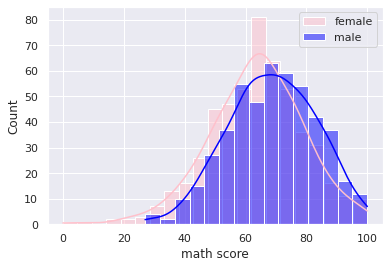

In [22]:
sns.set(style="darkgrid")
sns.histplot(data=female, x="math score", color="pink", label="female", kde=True)
sns.histplot(data=male, x="math score", color="blue", label="male", kde=True)
plt.legend()
plt.show()

In [23]:
#Với reading
female1 = gen_reading_df[gen_reading_df['gender']=='female']
male1 = gen_reading_df[gen_reading_df['gender']=='male']

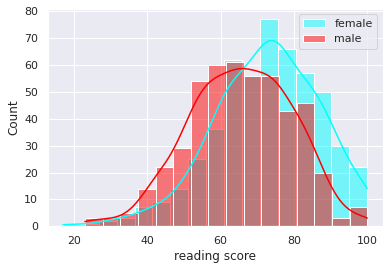

In [24]:
sns.set(style="darkgrid")
sns.histplot(data=female1, x="reading score", color="cyan", label="female", kde=True)
sns.histplot(data=male1, x="reading score", color="red", label="male", kde=True)
plt.legend()
plt.show()

In [25]:
#Với writing
female2 = gen_writing_df[gen_writing_df['gender']=='female']
male2 = gen_writing_df[gen_writing_df['gender']=='male']

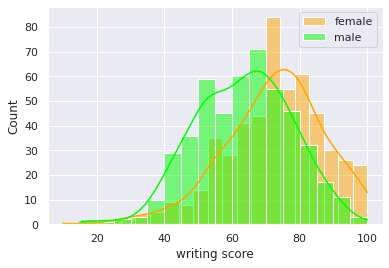

In [26]:
sns.set(style='darkgrid')
sns.histplot(data=female2, x='writing score', color = 'orange', label = 'female', kde=True)
sns.histplot(data=male2, x='writing score', color='lime', label='male', kde=True)
plt.legend()
plt.show()

2. Nghiên cứu ảnh hưởng của lunch lên điểm thi các môn math; reading và writing (chuyển điểm về A, B, C, D).

In [28]:
#Với math
bins = [0, 60, 75, 85, 100]
lunch_math = df[['lunch', 'math score']].copy()
lunch_math['ThangDiem'] = pd.cut(lunch_math['math score'], bins, labels=['D', 'C', 'B', 'A'])
lunch_math.sample(10)

,lunch,math score,ThangDiem
960,standard,56,D
759,standard,69,C
56,standard,82,B
592,standard,68,C
406,standard,65,C
49,standard,82,B
609,standard,58,D
185,free/reduced,65,C
457,free/reduced,53,D
20,standard,66,C


In [30]:
tanso_math1_df = pd.crosstab(lunch_math['lunch'], lunch_math['math score'])

In [32]:
score3, p_value3, dof3, expected = stats.chi2_contingency(tanso_math1_df)
p = {}
p['score'] = score3
p['p_value'] = p_value3
p['dof'] = dof3
results(p)

,score,p_value,score,p_value,KetLuan
,183.13539,4.637816e-10,183.13539,4.637816e-10,Chấp nhận H1 với mức ý nghĩa 0.05


In [33]:
#Với reading
bins = [0, 60, 75, 85, 100]
lunch_reading = df[['lunch', 'reading score']].copy()
lunch_reading['ThangDiem'] = pd.cut(lunch_reading['reading score'], bins, labels=['D', 'C', 'B', 'A'])
lunch_reading.sample(10)

,lunch,reading score,ThangDiem
798,standard,60,D
48,free/reduced,74,C
62,free/reduced,61,C
678,free/reduced,75,C
251,free/reduced,83,B
534,standard,69,C
116,free/reduced,85,B
269,free/reduced,76,B
73,free/reduced,57,D
311,standard,60,D


In [34]:
tanso_reading1_df = pd.crosstab(lunch_reading['lunch'], lunch_reading['reading score'])

In [35]:
score4, p_value4, dof4, expected = stats.chi2_contingency(tanso_reading1_df)
p = {}
p['score'] = score4
p['p_value'] = p_value4
p['dof'] = dof4
results(p)

,score,p_value,score,p_value,KetLuan
,122.103856,0.000157,122.103856,0.000157,Chấp nhận H1 với mức ý nghĩa 0.05


In [36]:
#Với writing
bins = [0, 60, 75, 85, 100]
lunch_writing = df[['lunch', 'writing score']].copy()
lunch_writing['ThangDiem'] = pd.cut(lunch_writing['writing score'], bins, labels=['D', 'C', 'B', 'A'])
lunch_writing.sample(10)

,lunch,writing score,ThangDiem
368,free/reduced,58,D
570,standard,70,C
205,standard,78,B
737,free/reduced,73,C
253,standard,72,C
67,standard,74,C
916,standard,100,A
259,free/reduced,81,B
659,standard,85,B
878,standard,80,B


In [37]:
tanso_writing1_df = pd.crosstab(lunch_writing['lunch'], lunch_writing['writing score'])

In [38]:
score5, p_value5, dof5, expected = stats.chi2_contingency(tanso_writing1_df)
p = {}
p['score'] = score5
p['p_value'] = p_value5
p['dof'] = dof5
results(p)

,score,p_value,score,p_value,KetLuan
,124.384538,0.00039,124.384538,0.00039,Chấp nhận H1 với mức ý nghĩa 0.05
